<a href="https://colab.research.google.com/github/pavangadhiya/Machine-Learning/blob/main/ML_Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from keras import backend as k

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else: 
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


<ipython-input-62-5ef4614b0c6e>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_train = torch.tensor(features_train, requires_grad=True)
<ipython-input-62-5ef4614b0c6e>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets_train = torch.tensor(targets_train)


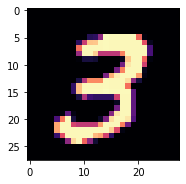

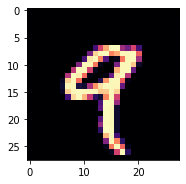

In [ ]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load MNIST dataset from torchvision.datasets
mnist = MNIST(root='data/', train=True, download=True)

# Convert features to float32 and targets to long
features_train = mnist.data.float()
targets_train = mnist.targets.long()

# Load MNIST dataset from torchvision.datasets
mnist = MNIST(root='data/', train=True, download=True)

# Convert features to float32 and targets to long
features_train = mnist.data.float()
targets_train = mnist.targets.long()

# Normalize features from [0, 255] to [0, 1]
features_train /= 255

# Flatten features to 1-D vector of 784 features
features_train = features_train.view(-1, 784)

# Define number of iterations, batch size, and epochs
n_iters = 5000
batch_size = 100
num_epochs = n_iters // (len(features_train) // batch_size)

# Create PyTorch tensor and variable for features and targets for training set
train_set = TensorDataset(features_train, targets_train)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
features_train = torch.tensor(features_train, requires_grad=True)
targets_train = torch.tensor(targets_train)

# Load test set and convert features to float32, normalize, and flatten
mnist_test = MNIST(root='data/', train=False, download=True)
features_test = mnist_test.data.float()
targets_test = mnist_test.targets.long()
features_test /= 255
features_test = features_test.view(-1, 784)

# Create PyTorch tensor for features and targets for test set
test_set = TensorDataset(features_test, targets_test)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Visualize one of the images in the training set
plt.subplot(1, 2, 1)
plt.imshow(mnist.data[7], cmap='magma')
plt.show()

plt.subplot(1, 2, 2) # index 2
plt.imshow(mnist.data[4], cmap='magma')
plt.show()


In [ ]:
import torch
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
# Set number of epochs
num_epochs = 5
count=0

# Define empty lists to store loss, iteration and accuracy values
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Convert input and labels to Variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = criterion(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        # Count iterations
        count += 1

        # Calculate accuracy every 50 iterations
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += labels.size(0)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # Store loss and iteration values
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        # Print loss and accuracy every 500 iterations
        if count % 500 == 0:
            print('Iteration: {} Loss: {:.4f} Accuracy: {:.2f} %'.
                  format(count, loss.data, accuracy))


Iteration: 500 Loss: 0.6138 Accuracy: 86.59 %
Iteration: 1000 Loss: 0.4949 Accuracy: 89.68 %
Iteration: 1500 Loss: 0.4199 Accuracy: 90.43 %
Iteration: 2000 Loss: 0.2429 Accuracy: 91.07 %
Iteration: 2500 Loss: 0.2987 Accuracy: 91.52 %
Iteration: 3000 Loss: 0.4007 Accuracy: 92.11 %


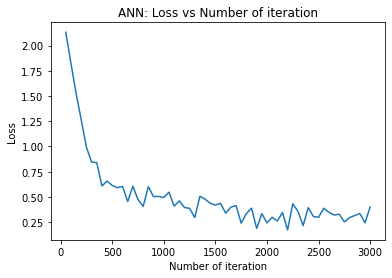

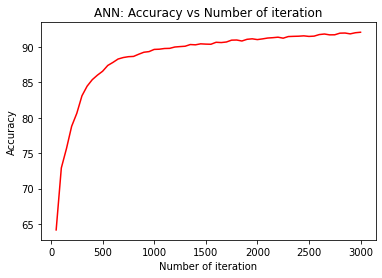

In [ ]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()
